# HTML: Requests y BeautifulSoup
## Parsing pagina12
<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178' width=300></img> En este módulo veremos cómo utilizar las bibliotecas requests y bs4 para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario Página 12.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:

1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra formateada en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática y sistemática para luego extraer la información deseada de la respuesta. Utilizaremos requests para realizar peticiones y recibir las respuestas y bs4 para parsear la respuesta y extraer la información.
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [187]:
import requests

In [188]:
url = 'https://www.pagina12.com.ar/'

In [189]:
p12 = requests.get(url)

In [190]:
p12.status_code

200

In [191]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Notas

In [192]:
p12.content

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:desc

In [193]:
p12.headers

{'Date': 'Sat, 28 Mar 2020 17:42:26 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d9e25cac8b200e2fe8001967ebcc1998c1585417346; expires=Mon, 27-Apr-20 17:42:26 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-Backend': 'prod_frontend_1', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '2', 'grace': '86400.000 none', 'ttl': '117.912', 'x-debug': '', 'X-Instance': 'cache-front-prod-varnish-76c5f88cf6-6j89c', 'x-restarts': '0', 'X-Cache': 'HIT (23)', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '57b325ccd9a8b546-BOG', 'Conte

In [194]:
p12.request.headers

{'User-Agent': 'python-requests/2.22.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [195]:
p12.request.method

'GET'

In [196]:
p12.request.url

'https://www.pagina12.com.ar/'

In [197]:
from bs4 import BeautifulSoup

In [198]:
s = BeautifulSoup(p12.text, 'lxml')

In [199]:
type(s)

bs4.BeautifulSoup

In [200]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

In [201]:
s.find('ul', attrs={'class':'hot-sections'})

<ul class="hot-sections"><li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li><li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li><li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li><li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/salta12">Salta12</a></li></ul>

In [202]:
secciones = s.find('ul', attrs={'class':'hot-sections'}).find_all('li')
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/salta12">Salta12</a></li>]

In [203]:
seccion = secciones[0]

In [204]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [205]:
seccion.a.get_text()

'El país'

In [206]:
links_secciones = [seccion.a.get('href') for seccion in secciones]

In [207]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa',
 'https://www.pagina12.com.ar/secciones/salta12']

In [208]:
sec = requests.get(links_secciones[0])

In [209]:
sec.status_code

200

In [210]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [211]:
print(s_seccion.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" prope

In [212]:
featured_article = s_seccion.find('div', attrs={'class':'featured-article__container'})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/255941-videollamadas-para-descomprimir-las-carceles">La situación en provincia de Buenos Aires</a></span><h2><a href="https://www.pagina12.com.ar/255941-videollamadas-para-descomprimir-las-carceles">Videollamadas para descomprimir las cárceles</a></h2><a href="https://www.pagina12.com.ar/255941-videollamadas-para-descomprimir-las-carceles"><p class="subhead"></p></a><div class="data-bar"><span class="date-1">28 de marzo de 2020</span><span> | </span><span class="tag-1"><strong><span>Por </span><a href="https://www.pagina12.com.ar/autores/1239-raul-kollmann">Raúl Kollmann</a></strong></span></div></div>

In [213]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/255941-videollamadas-para-descomprimir-las-carceles'

In [214]:
article_list = s_seccion.find('ul', attrs={'class':'article-list'})
article_list

<ul class="article-list"><li></li><li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h5 class="hide-for-xsmall-only hide-for-small-only"></h5><h2><a href="https://www.pagina12.com.ar/255892-estado-presente-y-responsabilidad-ciudadana">Estado presente y responsabilidad ciudadana<i>|</i><span>Las medidas de ailsamiento social frente al coronavirus </span></a></h2><div class="data-bar"><span class="date-1">28 de marzo de 2020</span><i>|</i><span class="tag-1">Por <a class="no-link">Carolina Gaillard</a></span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit intrinsic-container intrinsic-container-16x9" href="https://www.pagina12.com.ar/255892-estado-presente-y-responsabilidad-ciudadana"><img class

In [215]:
def obtener_notas(soup):
    '''
    Funcion que recibe un objeto de BeautifulSoup de una pagina de una seccion
    y devuelve una lista de URLs a las notas de esa seccion
    '''
    lista_notas=[]
    
    #Obtengo el articulo promocionado
    featured_article = soup.find('div', attrs={'class':'featured-article_container'})
    for article in article_list.find_all('li'):
        if article.a:
            lista_notas.append(article.a.get('href'))
            
    return lista_notas

In [216]:
lista_notas = obtener_notas(s_seccion)
lista_notas

['https://www.pagina12.com.ar/255892-estado-presente-y-responsabilidad-ciudadana',
 'https://www.pagina12.com.ar/255593-marina-cardelli-de-cascos-blancos-vamos-a-ir-casa-por-casa-d',
 'https://www.pagina12.com.ar/255838-alerta-en-las-islas-malvinas-por-un-posible-caso-de-coronavi',
 'https://www.pagina12.com.ar/255841-los-funcionarios-expondran-ante-los-diputados-por-teleconfer',
 'https://www.pagina12.com.ar/255858-el-estado-antivirus',
 'https://www.pagina12.com.ar/255861-coronavirus-en-cordoba-decomisan-los-autos-de-quienes-violan',
 'https://www.pagina12.com.ar/255864-un-listado-falso-de-organizaciones-que-reparten-alimentos',
 'https://www.pagina12.com.ar/255865-el-gobierno-evaluara-caso-por-caso',
 'https://www.pagina12.com.ar/255873-hay-una-decision-de-priorizar-la-salud',
 'https://www.pagina12.com.ar/255877-rechazo-a-la-detencion-domiciliaria-de-represores-de-mendoza',
 'https://www.pagina12.com.ar/255756-coronavirus-de-udine-a-el-bolson-sin-cuarentena',
 'https://www.pagina12

In [217]:
r = requests.get(url)

In [218]:
if r.status_code==200:
    # Procesando la respuesta
else:
    # Informamos el error

IndentationError: expected an indented block (<ipython-input-218-82c24c2fa81a>, line 3)

In [219]:
url_mala = url.replace('2','3')
url_mala

'https://www.pagina13.com.ar/'

In [220]:
try:
    requests.get(url_mala)
except Exception as e:
    print('error en la request')
    print(e)
    print('\n')

error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000019792ECCF88>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))




In [221]:
featured_article.b.get('href')

AttributeError: 'NoneType' object has no attribute 'get'

In [222]:
try:
    featured_article.b.get('href')
except:
    pass
print('continua el codigo')

continua el codigo


In [223]:
url_nota = lista_notas[0]
url_nota

'https://www.pagina12.com.ar/255892-estado-presente-y-responsabilidad-ciudadana'

In [225]:
try:
    nota = requests.get(url_nota)
    if nota.status_code ==200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        # Extraemos el titulo
        titulo = s_nota.find('h1', attrs={'class':'article-title'})
        print(titulo.text)
        # Extraemos la fecha
        fecha = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
        print(fecha)
        # Extraemos la volanta
        volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
        print(volanta.get_text())
        # Extraemos el copete
        copete = s_nota.find('div', attrs={'class':'article-summary'}).text
        print(copete)
        # Extraemos el cuerpo
        cuerpo = s_nota.find('div', attrs={'class':'article-text'})
        print(cuerpo.text)
except Exception as e:
    print('Error')
    print(e)
    print('\n')

Estado presente y responsabilidad ciudadana
2020-03-28
Las medidas de ailsamiento social frente al coronavirus 
Error
'NoneType' object has no attribute 'text'




In [226]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})

In [227]:
imagenes = media.find_all('img')
imagenes

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/media/articles/60829/alberto-afp-0.jpg?itok=CtLBDIfs" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/60829/alberto-afp-0.jpg?itok=rfBk_yR9" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/60829/alberto-afp-0.jpg?itok=rfBk_yR9" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/60829/alberto-afp-0.jpg?itok=rfBk_yR9" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show

In [228]:
if len(imagenes) == 0:
    print('No se encontraron imagenes')
else:
    imagen = imagenes[-1]
    img_src = imagen.get('data-src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/media/articles/60829/alberto-afp-0.jpg?itok=rfBk_yR9


In [229]:
img_rq = requests.get(img_src)

In [230]:
img_rq.status_code

200

In [231]:
from IPython.display import Image

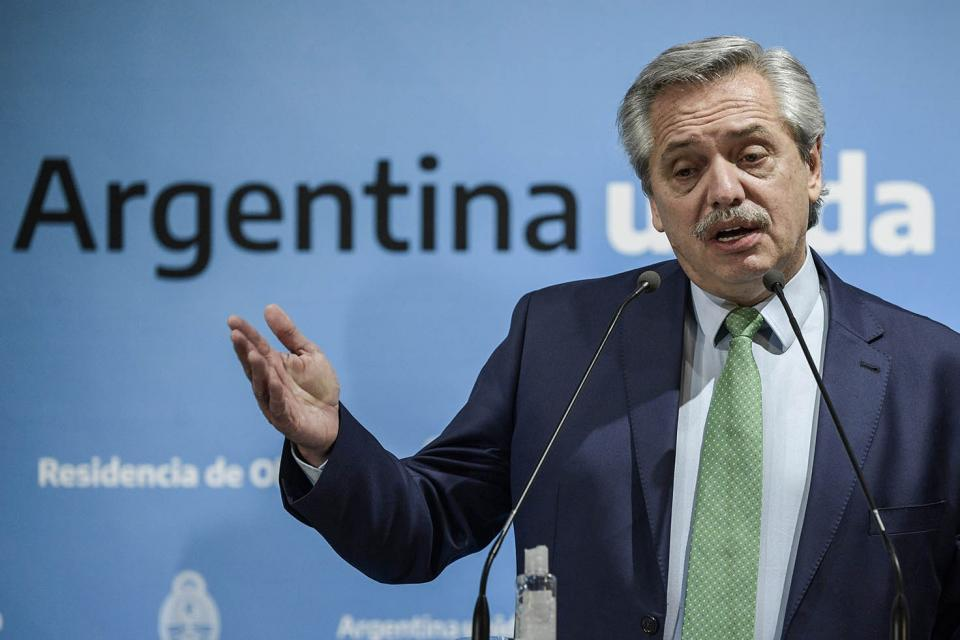

In [232]:
Image(img_rq.content)

In [233]:
def obtener_info(s_nota):
    
    # Creamos un diccionario vacío para poblarlo con la información
    ret_dict = {}
    
    # Extraemos la fecha
    fecha = s_nota.find('span', attrs={'pubdate':'pubdate'})
    if fecha:
        ret_dict['fecha'] = fecha.get('datetime')
    else:
        ret_dict['fecha'] = None
    
    # Extraemos el título
    titulo = s_nota.find('div', attrs={'class':'article-title'})
    if titulo:
        ret_dict['titulo'] = titulo.text
    else:
        ret_dict['titulo'] = None

    # Extraemos la volanta
    volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
    if volanta:
        ret_dict['volanta'] = volanta.get_text()
    else:
        ret_dict['volanta'] = None
    
    # Extraemos el copete
    copete = s_nota.find('div', attrs={'class':'article-summary'})
    if copete:
        ret_dict['copete'] = volanta.get_text()
    else:
        ret_dict['copete'] = None
    
    autor = s_nota.find('div', attrs={'class':'article-author'})
    if autor:
        ret_dict['autor'] = autor.a.get_text()
    else:
        ret_dict['autor'] = None
    
    # Extraemos la imagen
    media = s_nota.find('div', attrs={'class':'article-main-media-image'})
    if media:
        imagenes = media.find_all('img')
        if len(imagenes) == 0:
            print('no se encontraron imágenes')
        else:
            imagen = imagenes[-1]
            img_src = imagen.get('data-src')
            try:
                img_req = requests.get(img_src)
                if img_req.status_code == 200:
                    ret_dict['imagen'] = img_req.content
                else:
                    ret_dict['imagen'] = None
            except:
                print('No se pudo obtener la imagen')
    else:
        print('No se encontró media')
    
    # Extraemos el cuerpo de la nota
    cuerpo = s_nota.find('div', attrs={'class':'article-text'})
    if cuerpo:
        ret_dict['texto'] = cuerpo.get_text()
    else:
        ret_dict['texto'] = None
    
    return ret_dict

In [234]:

def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Exception as e:
        print('Error scrapeando URL', url)
        print(e)
        return None
    
    if nota.status_code !=200:
        print(f'Error obteniendo nota {url}')
        print(f'stuts Code = {nota.status_code}')
        return None
    
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    ret_dict = obtener_info(s_nota)
    ret_dict['url'] = url
    
    return ret_dict

In [235]:
scrape_nota(url_nota)

{'fecha': '2020-03-28',
 'titulo': 'OpiniónCuarentena: A ver quién gana',
 'volanta': 'Las medidas de ailsamiento social frente al coronavirus\xa0',
 'copete': None,
 'autor': 'Carolina Gaillard',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc2\x00\x11\x08\x02\x80\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xe21\xfa<\xed\xa6\rJ\xc1\x8c\x18\xc6\x0c\x1b,\x18\xc1\x8c\x19!\x0c\x01\x83i\x8

In [236]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa',
 'https://www.pagina12.com.ar/secciones/salta12']

In [239]:
notas = []
for link in links_secciones:
    try:
        r = requests.get(link)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'lxml')
            notas.extend(obtener_notas(soup))
        else:
            print('No se puedo obtener las seccion', link)
    except:
        print('No se puedo obtener las seccion', link)

In [240]:
notas

['https://www.pagina12.com.ar/255892-estado-presente-y-responsabilidad-ciudadana',
 'https://www.pagina12.com.ar/255593-marina-cardelli-de-cascos-blancos-vamos-a-ir-casa-por-casa-d',
 'https://www.pagina12.com.ar/255838-alerta-en-las-islas-malvinas-por-un-posible-caso-de-coronavi',
 'https://www.pagina12.com.ar/255841-los-funcionarios-expondran-ante-los-diputados-por-teleconfer',
 'https://www.pagina12.com.ar/255858-el-estado-antivirus',
 'https://www.pagina12.com.ar/255861-coronavirus-en-cordoba-decomisan-los-autos-de-quienes-violan',
 'https://www.pagina12.com.ar/255864-un-listado-falso-de-organizaciones-que-reparten-alimentos',
 'https://www.pagina12.com.ar/255865-el-gobierno-evaluara-caso-por-caso',
 'https://www.pagina12.com.ar/255873-hay-una-decision-de-priorizar-la-salud',
 'https://www.pagina12.com.ar/255877-rechazo-a-la-detencion-domiciliaria-de-represores-de-mendoza',
 'https://www.pagina12.com.ar/255756-coronavirus-de-udine-a-el-bolson-sin-cuarentena',
 'https://www.pagina12

In [241]:
data = []
for i, nota in enumerate(notas):
    print(f'Scrapeando nota{i}/{len(notas)}')
    data.append(scrape_nota(nota))

Scrapeando nota0/112
Scrapeando nota1/112
Scrapeando nota2/112
Scrapeando nota3/112
Scrapeando nota4/112
Scrapeando nota5/112
Scrapeando nota6/112
Scrapeando nota7/112
Scrapeando nota8/112
Scrapeando nota9/112
Scrapeando nota10/112
Scrapeando nota11/112
Scrapeando nota12/112
Scrapeando nota13/112
Scrapeando nota14/112
Scrapeando nota15/112
Scrapeando nota16/112
Scrapeando nota17/112
Scrapeando nota18/112
Scrapeando nota19/112
Scrapeando nota20/112
Scrapeando nota21/112
Scrapeando nota22/112
Scrapeando nota23/112
Scrapeando nota24/112
Scrapeando nota25/112
Scrapeando nota26/112
Scrapeando nota27/112
Scrapeando nota28/112
Scrapeando nota29/112
Scrapeando nota30/112
Scrapeando nota31/112
Scrapeando nota32/112
Scrapeando nota33/112
Scrapeando nota34/112
Scrapeando nota35/112
Scrapeando nota36/112
Scrapeando nota37/112
Scrapeando nota38/112
Scrapeando nota39/112
Scrapeando nota40/112
Scrapeando nota41/112
Scrapeando nota42/112
Scrapeando nota43/112
Scrapeando nota44/112
Scrapeando nota45/11

In [242]:
len(data)

112

In [243]:
import pandas as pd

In [244]:
df = pd.DataFrame(data)

In [246]:
df.head()

,fecha,titulo,volanta,copete,autor,imagen,texto,url
0,2020-03-28,OpiniónCuarentena: A ver quién gana,Las medidas de ailsamiento social frente al co...,None,Carolina Gaillard,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Cuando el Presidente Alberto Fernández anunció...,https://www.pagina12.com.ar/255892-estado-pres...
1,2020-03-28,OpiniónCuarentena: A ver quién gana,Asistencia humanitaria ante la pandemia del co...,Asistencia humanitaria ante la pandemia del co...,Fernando D´Addario,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Marina Cardelli es la primera presidenta mujer...,https://www.pagina12.com.ar/255593-marina-card...
2,2020-03-28,OpiniónCuarentena: A ver quién gana,Hay un menor internado y la isla entró en cuar...,Hay un menor internado y la isla entró en cuar...,Fernando D´Addario,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Las autoridades de las Islas Malvinas reportar...,https://www.pagina12.com.ar/255838-alerta-en-l...
3,2020-03-28,OpiniónCuarentena: A ver quién gana,Congreso virtual,Congreso virtual,Agustin Alvarez Rey,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"El presidente de la Cámara de Diputados, Sergi...",https://www.pagina12.com.ar/255841-los-funcion...
4,2020-03-28,OpiniónCuarentena: A ver quién gana,Argentina y Estados Unidos ante la pandemia,Argentina y Estados Unidos ante la pandemia,Luis Bruschtein,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Cual maldición bíblica o castigo divino la pes...,https://www.pagina12.com.ar/255858-el-estado-a...


In [247]:
df.to_csv('Notas Pagina12.csv')